# Математическая статистика
## Практическое задание 5

В данном задании предлагается провести некоторое исследование модели линейной регрессии и критериев для проверки статистических гипотез, в частности применить этим модели к реальным данным.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 5"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 7 баллов
* Задача 2 - 2 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 2 балла
* Задача 5<font size="5" color="red">\*</font> - 10 баллов
* Задача 6 - 5 баллов
* Задача 7 - 4 балла
* Задача 8<font size="5" color="red">\*</font> - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 10 баллов

In [414]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg
import sklearn
import sklearn.cross_validation
from IPython.display import display, HTML

## 1. Линейная регрессия

**Задача 1.** По шаблону напишите класс, реализующий линейную регрессию. Интерфейс этого класса в некоторой степени соответствует классу <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`LinearRegression`</a> из библиотеки `sklearn`.

In [169]:
X = np.array([
    [1., 0],
    [0, 1.],
    [1., 1.]
])

Y = np.array([1., 2., 1.])
class fool:
    pass
alpha = 0.95
self = fool
self.n, self.k = X.shape

self.theta = np.linalg.inv(X.T @ X) @ (X.T) @ Y
    # МНК-оценка = (Z.T * Z)^-1 * Z.T * Y

vector = Y - X @ self.theta
self.sigma_sq = 1. / (self.n - self.k) * (vector @ vector.T)
    # несмещенная оценка для sigma^2 = 1 / (n - k) * || Y - X * self.theta || ^2 

a = np.linalg.inv(X.T @ X)
u_upper = sps.t.ppf((1. + alpha) / 2., self.n - self.k)
u_lower = sps.t.ppf((1. - alpha) / 2., self.n - self.k)
ci = [
    [self.theta[i] - np.sqrt(a[i][i] * self.sigma_sq) * u_upper,
     self.theta[i] - np.sqrt(a[i][i] * self.sigma_sq) * u_lower]
    for i in range(self.k)
]
self.conf_int = np.array(ci)
    # (\theta_i - sqrt(a_{i,i} * self.sigma_sq) * U_{(1+alpha)/2},
    #   \theta_i - sqrt(a_{i,i} * self.sigma_sq) * U_{(1-alpha)/2})
    #доверительные интервалы для коэффициентов (матрица размера k x 2)
print(self.theta)
print(self.sigma_sq)
print(self.conf_int)
print(self.n, self.k)
print(a)

[ 0.33333333  1.33333333]
1.33333333333
[[-11.64619138  12.31285804]
 [-10.64619138  13.31285804]]
3 2
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


In [170]:
class LinearRegression:
    def __init__(self):
        super()
        
    def fit(self, X, Y, alpha=0.95):
        ''' Обучение модели. Предполагается модель Y = X * theta + epsilon, 
            где X --- регрессор, Y --- отклик,
            а epsilon имеет нормальное распределение с параметрами N(0, sigma^2 * I_n).
            alpha --- уровень доверия для доверительного интервала.
        '''
        
        self.n, self.k = X.shape

        self.theta = np.linalg.inv(X.T @ X) @ (X.T) @ Y
            # МНК-оценка = (Z.T * Z)^-1 * Z.T * Y

        vector = Y - X @ self.theta
        self.sigma_sq = 1. / (self.n - self.k) * (vector @ vector.T)
            # несмещенная оценка для sigma^2 = 1 / (n - k) * || Y - X * self.theta || ^2 

        a = np.linalg.inv(X.T @ X)
        u_upper = sps.t.ppf((1. + alpha) / 2., self.n - self.k)
        u_lower = sps.t.ppf((1. - alpha) / 2., self.n - self.k)
        ci = [
            [self.theta[i] - np.sqrt(a[i][i] * self.sigma_sq) * u_upper,
             self.theta[i] - np.sqrt(a[i][i] * self.sigma_sq) * u_lower]
            for i in range(self.k)
        ]
        self.conf_int = np.array(ci)
        
        return self
    
    def summary(self):
        print('Linear regression on %d features and %d examples' % (self.k, self.n))
        print('Sigma: %.6f' % self.sigma_sq)
        print('\t\tLower\t\tEstimation\tUpper')
        for j in range(self.k):
            print('theta_%d:\t%.6f\t%.6f\t%.6f' % (j, self.conf_int[j, 0], 
                                                   self.theta[j], self.conf_int[j, 1]))
        
    def predict(self, X):
        ''' Возвращает предсказание отклика на новых объектах X. '''
        
        Y_pred = X @ self.theta
        return Y_pred

In [171]:
Z = np.array([[9., 3.], [9., 5.], [7.,6.]])
LR = LinearRegression()
LR.fit(X=X, Y=Y)
LR.summary()
print(LR.predict(Z))

import sklearn.linear_model
SLR = sklearn.linear_model.LinearRegression()
SLR.fit(X=X,y=Y)
print(SLR.coef_)
print(SLR.predict(Z))

Linear regression on 2 features and 3 examples
Sigma: 1.333333
		Lower		Estimation	Upper
theta_0:	-11.646191	0.333333	12.312858
theta_1:	-10.646191	1.333333	13.312858
[  7.           9.66666667  10.33333333]
[ -1.00000000e+00   3.39934989e-16]
[-7. -7. -5.]


Загрузите данные о потреблении мороженного в зависимости от температуры воздуха и цены (файл `ice_cream.txt`).
Примените реализованный выше класс линейной регрессии к этим данным предполагая, что модель имеет вид $ic = \theta_1 + \theta_2\ t$, где $t$ --- температура воздуха (столбец `temp`), $ic$ --- постребление мороженного в литрах на человека (столбец `IC`).
Значения температуры предварительно переведите из Фаренгейта в Цельсий [(Фаренгейт — 32) / 1,8 = Цельсий].

К обученной модели примените фунцию `summary` и постройте график регрессии, то есть график прямой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t$, где $\widehat{\theta}_1, \widehat{\theta}_2$ --- МНК-оценки коэффициентов.
На график нанесите точки выборки.
Убедитесь, что построейнный график совпадает с графиком из презентации с первой лекции, правда, с точностью до значений температура (она была неправильно переведена из Фаренгейта в Цельсий).

In [280]:
df = pd.read_csv("ice_cream.txt", sep="\t")
Y = df.IC.values
temp = df.temp.values
temp = (temp - 32) / 1.8
X = np.array([np.ones(temp.size), temp]).T
print(df)
print(X.T)
print(Y)

    date     IC  price  income  temp  Lag-temp  Year
0      1  0.386  0.270      78    41        56     0
1      2  0.374  0.282      79    56        63     0
2      3  0.393  0.277      81    63        68     0
3      4  0.425  0.280      80    68        69     0
4      5  0.406  0.272      76    69        65     0
5      6  0.344  0.262      78    65        61     0
6      7  0.327  0.275      82    61        47     0
7      8  0.288  0.267      79    47        32     0
8      9  0.269  0.265      76    32        24     0
9     10  0.256  0.277      79    24        28     0
10    11  0.286  0.282      82    28        26     1
11    12  0.298  0.270      85    26        32     1
12    13  0.329  0.272      86    32        40     1
13    14  0.318  0.287      83    40        55     1
14    15  0.381  0.277      84    55        63     1
15    16  0.381  0.287      82    63        72     1
16    17  0.470  0.280      80    72        72     1
17    18  0.443  0.277      78    72        67

In [185]:
LR = LinearRegression()
LR.fit(X=X, Y=Y)
LR.summary()

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_0:	0.283276	0.306298	0.329319
theta_1:	0.003831	0.005593	0.007355


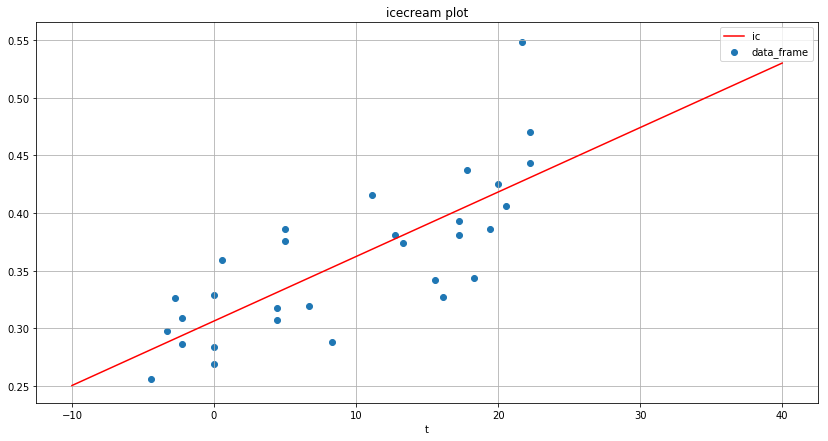

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_0:	0.283276	0.306298	0.329319
theta_1:	0.003831	0.005593	0.007355


In [186]:
grid = np.linspace(-10., 40, 1000)
X = X_cn_2 = np.array([np.ones(grid.size), grid]).T
ic = LR.predict(X)

plt.figure(figsize=(14,7))
plt.title("icecream plot")
plt.plot(grid, ic, label="ic", color="red")
plt.scatter(temp, df.IC.values, label="data_frame")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

LR.summary()

Теперь учтите влияние года (столбец `Year`) для двух случаев:
* модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$. Поясните, почему нельзя рассмативать одну переменную $y$ --- номер года.
* для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

В каждом случае нарисуйте графики. Отличаются ли полученные результаты? От чего это зависит? Как зависит потребление мороженного от года? 

**Комментарий:** Использование одной переменной для номера года означало бы, что мало того, что в разные годы один и тот же коэффициент, так ещё и потребление мороженного линейно (как $ic = C(t) + k y$) зависит от номера года(в произвольной системе отсчёта), что совершенно не верно. Разумно ввести три константы для трёх лет, но при этом можно вычесть константу для нулевого года из двух других, прибавить в $\theta_1$  и считать, что константа нулевого года равна нулю 

In [187]:
df2 = df[["date", "IC", "price", "income", "temp", "Lag-temp"]]
for y in [0, 1, 2]:
    df2["Year=%d" % (y)] =  1 * (df.Year.values == y)
print(df2)


X = np.array(
    [np.ones(temp.size), temp, df2["Year=1"].values, df2["Year=2"].values]
).T
Y = df.IC.values
LR = LinearRegression()
LR.fit(X=X, Y=Y)

    date     IC  price  income  temp  Lag-temp  Year=0  Year=1  Year=2
0      1  0.386  0.270      78    41        56       1       0       0
1      2  0.374  0.282      79    56        63       1       0       0
2      3  0.393  0.277      81    63        68       1       0       0
3      4  0.425  0.280      80    68        69       1       0       0
4      5  0.406  0.272      76    69        65       1       0       0
5      6  0.344  0.262      78    65        61       1       0       0
6      7  0.327  0.275      82    61        47       1       0       0
7      8  0.288  0.267      79    47        32       1       0       0
8      9  0.269  0.265      76    32        24       1       0       0
9     10  0.256  0.277      79    24        28       1       0       0
10    11  0.286  0.282      82    28        26       0       1       0
11    12  0.298  0.270      85    26        32       0       1       0
12    13  0.329  0.272      86    32        40       0       1       0
13    

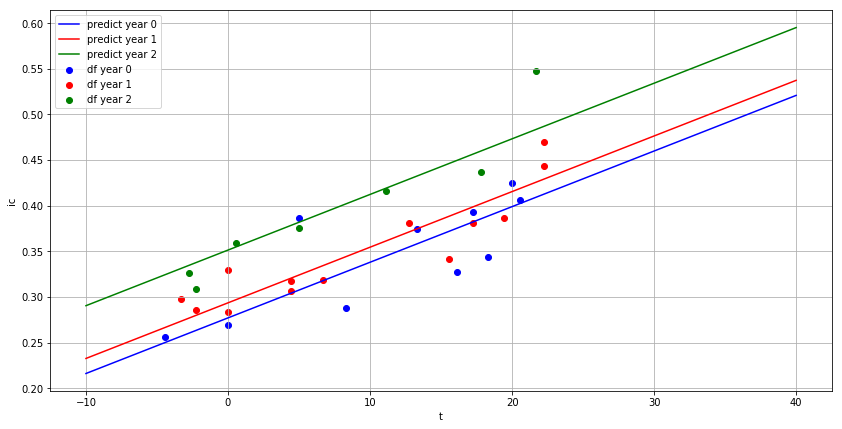

In [188]:
def plot(LR):
    grid = np.linspace(-10., 40, 1000)

    X_year_0 = np.array([np.ones(grid.size), grid, np.zeros(grid.size), np.zeros(grid.size)]).T
    X_year_1 = np.array([np.ones(grid.size), grid, np.ones(grid.size), np.zeros(grid.size)]).T
    X_year_2 = np.array([np.ones(grid.size), grid, np.zeros(grid.size), np.ones(grid.size)]).T

    df_year = np.array([
        np.array([[temp[i], df.IC[i]] for i in range(temp.size) if df.Year[i] == y])
        for y in [0, 1, 2]
    ])
    plt.figure(figsize=(14,7))
    plt.scatter((df_year[0]).T[0], (df_year[0]).T[1], color="blue", label="df year 0")
    plt.scatter((df_year[1]).T[0], (df_year[1]).T[1], color="red", label="df year 1")
    plt.scatter((df_year[2]).T[0], (df_year[2]).T[1], color="green", label="df year 2")

    plt.plot(grid, LR.predict(X_year_0), color="blue", label="predict year 0")
    plt.plot(grid, LR.predict(X_year_1), color="red", label="predict year 1")
    plt.plot(grid, LR.predict(X_year_2), color="green", label="predict year 2")
    plt.ylabel("ic")
    plt.xlabel("t")
    plt.legend()
    plt.grid()
    plt.show()
    
plot(LR)

**Комментарий:** полученные данные для годов отличаются на константу: т.е. изменение потребления при изменении на градус не изменилась, но констата в уравнении прямой увеличилась. (т.е. меняется параметр $\theta_1$ от года, тогда как $\theta_2$ остаётся постоянным). (Собственно, что и описано в модели)

Наконец, обучите модель на предсказание потребления мороженного в зависимости от всех переменных.
Не забудьте, что для года нужно ввести две переменных.
Для полученной модели выведите `summary`.

**Комментарий:** если мы обучим модель от всех переменных, т.е. будем предсказывать IC по данным, содержащим IC, то придёт Виктор Кантор и начнёт рассказывать историю про танки

In [189]:
LG = LinearRegression()
LG.fit(X=df2.values, Y=df2.IC.values)
LG.summary()

Linear regression on 9 features and 30 examples
Sigma: 0.000000
		Lower		Estimation	Upper
theta_0:	-0.000000	-0.000000	0.000000
theta_1:	1.000000	1.000000	1.000000
theta_2:	-0.000000	-0.000000	0.000000
theta_3:	-0.000000	0.000000	0.000000
theta_4:	-0.000000	-0.000000	0.000000
theta_5:	-0.000000	-0.000000	0.000000
theta_6:	-0.000000	-0.000000	0.000000
theta_7:	-0.000000	-0.000000	0.000000
theta_8:	-0.000000	-0.000000	0.000000


**Комментарий:** Как мы видим, модель оказалась достаточно умна, чтобы понять, что прогнозируемые данные есть в выборке. Обучим модель теперь нормально

In [190]:
X = df2[["date", "price", "income", "temp", "Lag-temp", "Year=1", "Year=2"]].values
Y = df2.IC.values
LG = LinearRegression()
LG.fit(X=X, Y=Y)
LG.summary()

Linear regression on 7 features and 30 examples
Sigma: 0.000961
		Lower		Estimation	Upper
theta_0:	-0.009674	-0.005242	-0.000809
theta_1:	-0.631974	0.459136	1.550245
theta_2:	-0.002855	0.000845	0.004545
theta_3:	0.003089	0.004105	0.005122
theta_4:	-0.001544	-0.000636	0.000271
theta_5:	0.014490	0.070345	0.126200
theta_6:	0.076402	0.175412	0.274423


**Комментарий:** Если мы как-нибудь отнормируем данные - сможем оценивать полезность параметров

Но это еще не все.
Постройте теперь линейную регрессию для модели $ic = \theta_1 + \theta_2\ t + \theta_3\ t^2 + \theta_4\ t^3$.
Выведите для нее summary и постройте график предсказания, то есть график кривой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t + \widehat{\theta}_3\ t^2 + \widehat{\theta}_4\ t^3$. Хорошие ли получаются результаты?

Linear regression on 4 features and 30 examples
Sigma: 0.001529
		Lower		Estimation	Upper
theta_0:	0.295294	0.319902	0.344510
theta_1:	0.000388	0.007200	0.014013
theta_2:	-0.001861	-0.000855	0.000152
theta_3:	0.000002	0.000038	0.000073


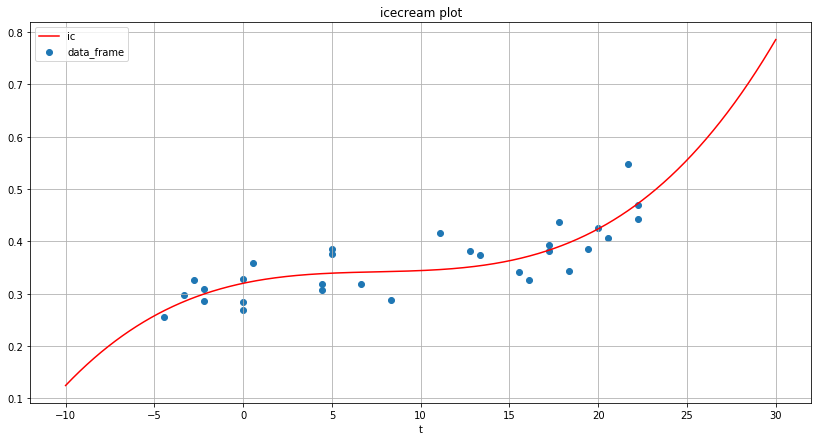

Linear regression on 4 features and 30 examples
Sigma: 0.001529
		Lower		Estimation	Upper
theta_0:	0.295294	0.319902	0.344510
theta_1:	0.000388	0.007200	0.014013
theta_2:	-0.001861	-0.000855	0.000152
theta_3:	0.000002	0.000038	0.000073


In [192]:
grid = np.linspace(-10., 30, 1000)
X = X_cn =  np.array([np.ones(temp.size), temp, temp**2, temp**3]).T
Y = df.IC.values

LR = LinearRegression()
LR.fit(X=X, Y=Y)
LR.summary()

grid = np.linspace(-10., 30, 1000)
X = np.array([np.ones(grid.size), grid, grid**2, grid**3]).T
ic = LR.predict(X)

plt.figure(figsize=(14,7))
plt.title("icecream plot")
plt.plot(grid, ic, label="ic", color="red")
plt.scatter(temp, df.IC.values, label="data_frame")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

LR.summary()

**Комментарий:** Получилась оценка, визуально очень крутая. Можно расширить пространство признаков, добавив, например цену, и, возможно, получить очень точные значения

Чтобы понять, почему так происходит, выведите значения матрицы $(X^T X)^{-1}$ для данной матрицы и посчитайте для нее индекс обусловленности $\sqrt{\left.\lambda_{max}\right/\lambda_{min}}$, где $\lambda_{max}, \lambda_{min}$ --- максимальный и минимальный собственные значения матрицы $X^T X$. Собственные значения можно посчитать функцией <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html">`scipy.linalg.eigvals`</a>.

Прокомментируйте полученные результаты. Помочь в этом может следующая <a href="https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8">статья</a>.

In [193]:
def condition_number_calc(X):
    eigs = scipy.linalg.eigvals(np.linalg.inv(X.T @ X))
    #print("eigs = ", eigs)
    condition_number = np.sqrt(eigs.max() / eigs.min())
    print("condition_number = ", condition_number)
    

print("Последний график (c t, t**2, ...)")
condition_number_calc(X_cn)

print("Первый график (cамый первый)")
condition_number_calc(X_cn_2)

Последний график (c t, t**2, ...)
condition_number =  (8140.3947489+0j)
Первый график (cамый первый)
condition_number =  (30.0570169914+0j)


** Комментарий: ** (вывод размазан по задаче на комментарии) Здесь (http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BC%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29) написано что и почему большое число обусловленности указывает на зависимость близкую к линейной между признаками и чем больше максимальное число обусловленности, тем сильнее зависимость. Т.е. возможно, несмотря на меньшую сигму, такой набор признаков не оптимален.

**Задача 2.** В данной задаче нужно реализовать функцию отбора признаков для линейной регрессии. Иначе говоря, пусть есть модель $y = \theta_1 x_1 + ... + \theta_k x_k$. Нужно определить, какие $\theta_j$ нужно положить равными нулю, чтобы качество полученной модели было максимальным.

Для этого имеющиеся данные нужно случайно разделить на две части --- обучение и тест (train и test). На первой части нужно обучить модель регресии, взяв некоторые из признаков, то есть рассмотреть модель $y = \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$. По второй части нужно посчитать ее качество --- среднеквадратичное отклонение (mean squared error) предсказания от истинного значения отклика, то есть величину
$$MSE = \sum\limits_{i \in test} \left(\widehat{y}(x_i) - Y_i\right)^2,$$
где $x_i = (x_{i,1}, ..., x_{i,k})$, $Y_i$ --- отклик на объекте $x_i$, а $\widehat{y}(x)$ --- оценка отклика на объекте $x$.

Если $k$ невелико, то подобным образом можно перебрать все поднаборы признаков и выбрать наилучший по значению MSE.

Для выполнения задания воспользуйтесь следующими функциями:
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`sklearn.linear_model.LinearRegression`</a>
--- реализация линейной регрессии. В данной реализации свободный параметр $\theta_1$ по умолчанию автоматически включается в модель. Отключить это можно с помощью `fit_intercept=False`, но это не нужно. *В данной задаче требуется, чтобы вы воспользовались готовой реализацией линейной регрессии, а не своей. Ведь на практике важно уметь применять готовые реализации, а не писать их самостоятельно.*

* <a href="http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html">`sklearn.cross_validation.train_test_split`</a>
--- функция разбиения данных на train и test. Установите параметр `test_size=0.3`.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">`sklearn.metrics.mean_squared_error`</a>
--- реализация MSE.

Для перебора реализуйте функцию.

In [256]:
def best_features(X_train, X_test, Y_train, Y_test):
    mses = []  # сюда записывайте значения MSE
    k = X_train.shape[1]

    for j in range(1, 2 ** k):  # номер набора признаков
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]  # набор признаков
        
        X_train_cutted = X_train[:, mask]
        X_test_cutted = X_test[:, mask]
        #print(X_train_cutted[0])
        #print(X_train_cutted.shape, X_test_cutted.shape)
        regressor = sklearn.linear_model.LinearRegression()
        regressor.fit(X=X_train_cutted,y=Y_train)
        Y_predicted = regressor.predict(X_test_cutted)
        
        mse = sklearn.metrics.mean_squared_error(Y_test, Y_predicted)  
            # MSE для данного набора признаков
        mses.append(mse)
        
    # Печать 10 лучших наборов
    print('mse\t features')
    mses = np.array(mses)
    best_numbres = np.argsort(mses)[:10]
    for j in best_numbres:
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]
        print('%.3f\t' % mses[j], features_numbers)

Примените реализованный отбор признаков к датасетам
* <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a> --- для парусных яхт нужно оценить остаточное сопротивление на единицу массы смещения (последний столбец) в зависимости от различных характеристик яхты.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston Housing Prices</a> --- цены на дома в Бостоне в зависимости от ряда особенностей.

In [200]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data

--2017-05-20 20:41:29--  http://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 11487 (11K) [text/plain]
Сохранение в каталог: ««yacht_hydrodynamics.data.2»».

yacht_hydrodynamics 100%[===================>]  11,22K  --.-KB/s    in 0,004s  

2017-05-20 20:41:29 (3,08 MB/s) - «yacht_hydrodynamics.data.2» сохранён [11487/11487]



In [275]:
df = pd.read_fwf("yacht_hydrodynamics.data", sep=' ', header=None)
print(df.values, df.values.shape) # we just removed "\n" from
X = df.values[:, 0:6]
Y = df.values[:, 6]
print(X.shape, Y.shape) #, X, Y)
for i in range(3):
    print("Run %d:" % (i))
    X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size=0.3)
    best_features(X_train, X_test, Y_train, Y_test)

[[ -2.3     0.568   4.78  ...,   3.17    0.125   0.11 ]
 [ -2.3     0.568   4.78  ...,   3.17    0.15    0.27 ]
 [ -2.3     0.568   4.78  ...,   3.17    0.175   0.47 ]
 ..., 
 [ -2.3     0.6     4.34  ...,   2.73    0.4    19.59 ]
 [ -2.3     0.6     4.34  ...,   2.73    0.425  30.48 ]
 [ -2.3     0.6     4.34  ...,   2.73    0.45   46.66 ]] (308, 7)
(308, 6) (308,)
Run 0:
mse	 features
83.212	 [0 1 2 5]
83.220	 [0 1 2 4 5]
83.253	 [0 1 2 3 4]
83.291	 [3 5]
83.291	 [0 1 2 3 5]
83.300	 [3 4 5]
83.321	 [0 1 3 5]
83.333	 [5]
83.374	 [4 5]
83.390	 [2 3 5]
Run 1:
mse	 features
75.028	 [0 5]
75.175	 [0 1 2 3 4]
75.224	 [0 2 5]
75.348	 [0 1 5]
75.699	 [0 1 2 5]
76.000	 [0 3 5]
76.200	 [0 1 3 5]
76.724	 [0 2 3 5]
77.039	 [0 4 5]
77.043	 [0 1 2 4 5]
Run 2:
mse	 features
70.222	 [0 1 2 3 4]
70.294	 [0 1 2 3 5]
70.569	 [0 1 2 5]
70.613	 [0 1 3 4 5]
70.651	 [0 1 5]
70.702	 [0 1 4 5]
70.742	 [0 1 3 5]
70.811	 [0 1 2 4 5]
70.928	 [0 5]
71.029	 [0 3 5]


In [272]:
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.data, boston.data.shape)

for i in range(3):
    print("Run %d:" % (i))
    X_train, X_test, Y_train, Y_test = (
        sklearn.cross_validation.train_test_split(boston.data, boston.target, test_size=0.3) #, random_state=17)
    )
    best_features(X_train, X_test, Y_train, Y_test)

Run 0:
mse	 features
23.439	 [ 1  4  5  7  8 10 11 12]
23.440	 [ 1  4  5  6  7  8 10 11 12]
23.702	 [ 1  3  4  5  7  8 10 11 12]
23.703	 [ 1  3  4  5  6  7  8 10 11 12]
23.719	 [ 4  5  7  8 10 11 12]
23.735	 [ 4  5  6  7  8 10 11 12]
23.882	 [ 1  4  5  6  7  9 10 11 12]
23.883	 [ 1  4  5  6  7 10 11 12]
23.885	 [ 1  4  5  7  9 10 11 12]
23.886	 [ 1  4  5  7 10 11 12]
Run 1:
mse	 features
31.258	 [ 0  2  3  4  5  7  8  9 10 11 12]
31.262	 [ 1  2  3  4  5  7  8  9 10 11 12]
31.276	 [ 1  3  4  5  7  8  9 10 11 12]
31.290	 [ 0  3  4  5  7  8  9 10 11 12]
31.746	 [ 0  3  4  5  7  8 10 11 12]
31.785	 [ 1  3  4  5  7  8 10 11 12]
31.854	 [ 0  2  3  4  5  7  8 10 11 12]
31.890	 [ 1  2  3  4  5  7  8 10 11 12]
31.955	 [ 1  2  4  5  7  8  9 10 11 12]
31.992	 [ 1  4  5  7  8  9 10 11 12]
Run 2:
mse	 features
21.954	 [ 1  3  4  5  6  7  8 10 11]
22.048	 [ 1  2  3  4  5  6  7  8 10 11]
22.152	 [ 1  3  4  5  6  7 10 11]
22.158	 [ 1  3  4  5  6  7  8  9 10 11]
22.190	 [ 1  3  4  5  6  7  9 10 11]
22.

** Вывод: ** Мы смогли выделить несколько признаков, оказавшихся лучшими. Хорошей идеей является множественный запуск, т.к. такой "рейтинг признаков" весьма случаен и может вызван "удачным" разделением на _test и _train, т.е. первый признак в списке может не являться действительно хорошим.

**Задача 3<font size="5" color="red">\*</font>.** Загрузите <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt">датасет</a>, в котором показана зависимость веса мозга от веса туловища для некоторых видов млекопитающих. Задача состоит в том, чтобы подобрать по этим данным хорошую модель регрессии. Для этого, можно попробовать взять некоторые функции от значения веса туловища, например, степенную, показательную, логарифмическую. Можно также сделать преобразование значений веса мозга, например, прологарифмировать. Кроме того, можно разбить значения веса туловища на несколько частей и на каждой части строить свою модель линейной регрессии.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную **область?** для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Какой вывод можно сделать?

________________________
Построим сначала доверительные интервалы для параметров, всё-таки области мы не строили и это что-то новое
________________________
$\forall i :X_i \sim \mathcal{N}(a, \sigma^2) \Rightarrow \forall i X_i  = 1 \cdot a + \xi, \xi \sim \mathcal{N}(0,\sigma^2) \Rightarrow$ это же задача линейной гауссовской регрессионной модели!

Более того, это задача 9.4 из домашнего задания из "методички" и она разобрана как задача 9.2 в теоретической части. Мы уже строили доверительные интервалы для theta из линейной регрессии, так что для оценки $a \equiv \theta_0$ вызовем написанный класс

Для оценки $\sigma^2$ (построения доверительного интервала) используем интервал $(0, \frac{(n-k)\widehat{\sigma}^2}{z_{1-\gamma}})$ уровня доверия $\gamma$, где $z_{1-\gamma}$ - $\gamma$-квантиль распределения $\chi^2_{n-k}$ (это доказано в методичке в задаче 9.2)

In [306]:
alpha = 0.95
for n in [5, 20, 50]:
    print("\n_____Run:(n = %d) (a == \\theta_0)_________" %  n)
    Y = sps.norm.rvs(size=n)
    LR = LinearRegression()
    LR.fit(X=np.array(np.array([np.ones(n)]).T), Y=Y,alpha=alpha)
    LR.summary()

    print("Confidence interval for \widehat{\sigma}^2:")

    z = sps.chi2.ppf(1. - alpha, LR.n - LR.k)
    sigma_upper = (LR.n - LR.k) * LR.sigma_sq / z
    print("(0, %f)" % sigma_upper)


_____Run:(n = 5) (a == \theta_0)_________
Linear regression on 1 features and 5 examples
Sigma: 0.230079
		Lower		Estimation	Upper
theta_0:	-0.818595	-0.223011	0.372573
Confidence interval for \widehat{\sigma}^2:
(0, 1.294904)

_____Run:(n = 20) (a == \theta_0)_________
Linear regression on 1 features and 20 examples
Sigma: 0.843730
		Lower		Estimation	Upper
theta_0:	-0.503770	-0.073877	0.356017
Confidence interval for \widehat{\sigma}^2:
(0, 1.584546)

_____Run:(n = 50) (a == \theta_0)_________
Linear regression on 1 features and 50 examples
Sigma: 0.805630
		Lower		Estimation	Upper
theta_0:	-0.514836	-0.259749	-0.004663
Confidence interval for \widehat{\sigma}^2:
(0, 1.163440)


______________
Если всё-таки требуются области то, случайно, открыв книгу "Ллойд Э., Ледерман У. (ред.). Справочник по прикладной статистике. Том 1. М.: Финансы и статистика, 1989. - 510 с. " на 182ой странице, увидим там доверительный интервал для двумерного параметра:
$
\begin{equation*}
 \begin{cases}
   \mu - u_0 \sigma/\sqrt{n} \leq \overline{X}
   \\
   \mu + u_0 \sigma/\sqrt{n} \geq \overline{X}
   \\
   (n -1)^{1/2}S/b \leq \sigma \leq (n-1)^{1/2}S/a
 \end{cases}
\end{equation*}$
Где $\mu_0$ - квантиль уровня $\sqrt{0.95}$ из нормального распределения, a, b - квантили уровней $(1 - \sqrt{0.95})/2$ и $(1 + \sqrt{0.95})/2$ соответственно из распределения $\chi^2_{n-1}$ (этот интервал построен, исходя из независимости статистик $\overline{X}, S$, так, что по каждому параметру получается уровень $\sqrt{0.95}$ с целью получить 0.95 в итоге


_____Run:(n = 5)_________
(800, 500, 2)
(800, 500)


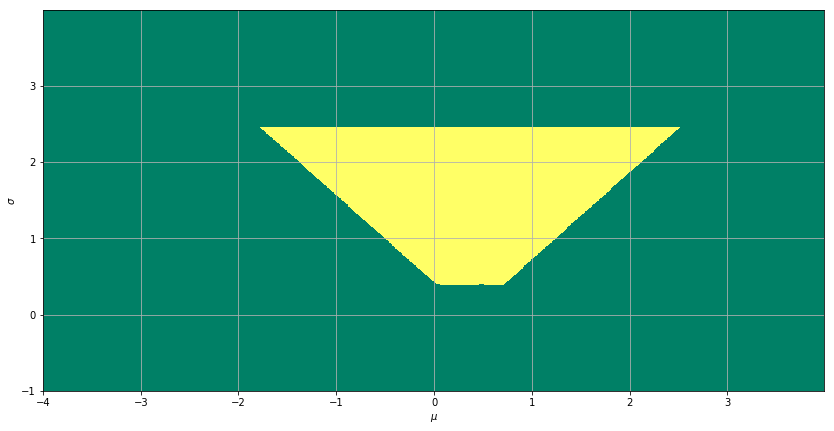


_____Run:(n = 20)_________
(800, 500, 2)
(800, 500)


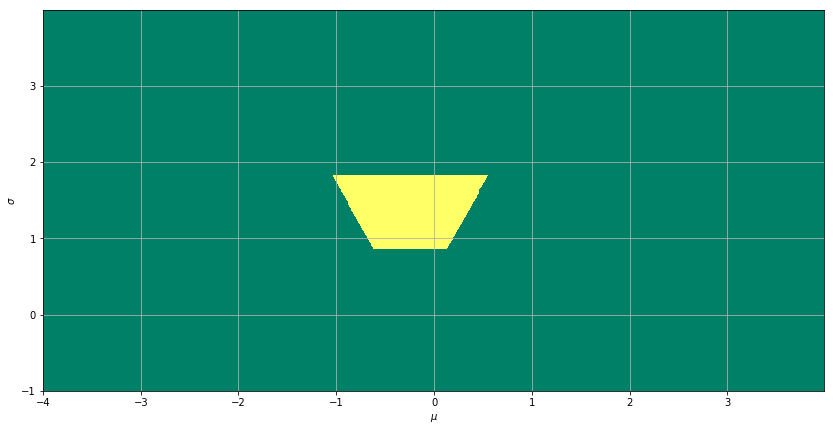


_____Run:(n = 50)_________
(800, 500, 2)
(800, 500)


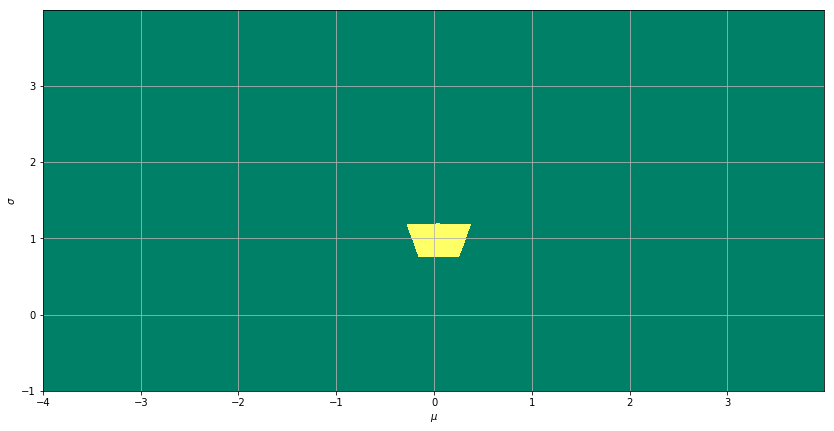

In [333]:
alpha = 0.95
u0 = sps.norm.ppf(np.sqrt(0.95))
for n in [5, 20, 50]:
    
    a = sps.chi2.ppf((1. - np.sqrt(0.95))/2, n-1.)
    b = sps.chi2.ppf((1. + np.sqrt(0.95))/2, n-1.)
    print("\n_____Run:(n = %d)_________" %  n)
    X = sps.norm.rvs(size=n)
    X_mean = X.mean()
    S2 = (X*X).mean() - X_mean**2
    
    mgrid = np.mgrid[-4:4:0.01, -1:4:0.01]
    grid = np.empty(mgrid[0].shape + (2,))
    grid[:, :, 0] = mgrid[0]
    grid[:, :, 1] = mgrid[1]
    
    def check(mu, sig):
        fst = mu - u0*sig/np.sqrt(n) <= X_mean
        snd = mu + u0*sig/np.sqrt(n) >= X_mean
        thr = np.sqrt((n - 1) *S2/b) <= sig
        fth = sig <= np.sqrt((n-1) * S2 / a)
        return fst and snd and thr and fth
    
    CI = np.array([
        [1 if check(grid[x, y, 0], grid[x, y, 1]) else 0 for y in range(grid.shape[1])]
        for x in range(grid.shape[0])
    ])
    print(grid.shape)
    print(CI.shape)
    plt.figure(figsize=(14,7))
    plt.pcolormesh(mgrid[0], mgrid[1], CI, label="Confidence interval", cmap='summer')
    plt.grid()
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$\sigma$")
    plt.show()

** Вывод: ** Раз уж мы свели задачу к задаче линейной регрессии в гауссовской модели, то можно сказать, что для неё важен размер выборки - чем он больше, тем меньше доверительные интервалы. 

**Комментарий:** картинка совпадает с картинкой (по форме) из книги

**Задача 5<font size="5" color="red">\*</font>.** 
Пусть дана линейная гауссовская модель $Y = X\theta + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, \beta^{-1}I_n)$.
Пусть $\theta$ имеет априорное распределение $\mathcal{N}(0, \alpha^{-1}I_k)$. 
Такая постановка задачи соответствует Ridge-регрессии.
Оценкой параметров будет математическое ожидание по апостериорному распределению, аналогично можно получить доверительный интервал.
Кроме того, с помощью апостериорного распределения можно получить доверительный интервал для отклика на новом объекте, а не только точечную оценку.

Реализуйте класс RidgeRegression подобно классу LinearRegression, но добавьте в него так же возможность получения доверительного интервала для отклика на новом объекте.
Примените модель к некоторых датасетам, которые рассматривались в предыдущих задачах.
Нарисуйте графики оценки отклика на новом объекте и доверительные интервалы для него.

## 2. Проверка статистических гипотез

**Задача 6.** 
Существует примета, что если перед вам дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 
Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Нужно проверить гипотезу $H_0: p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $H_1: p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) > c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для данной задачи. 
Чему при этом равно $c_\alpha$?
При этом p-value в данной задаче определяется как $p(t) = \mathsf{P}_{0.5}(T(X) > t)$, где $t = \sum x_i$ --- реализация статистики $T(X)$.

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы.

Пользуйтесь функциями из `scipy.stats`, про которые подробно написано в файле `python_5`. Внимательно проверьте правильность строгих и нестрогих знаков.

__________
$P_{\theta_0=\frac{1}{2}}(T(X) > c_\alpha) = \alpha = 1 - P_{\theta_0=\frac{1}{2}}(T(X) \leq c_\alpha) $ (Это из теоремы о мнотонном отношении правдоподобия)

$c_\alpha = z_{1 - \alpha}$, где z - квантиль из распределения $Bin(p=\theta_0, n)$

In [371]:
theta_0 = 0.5
alpha=0.5
df = []
for n,p in [(5, 0.5), (20,0.5), (50,0.5), (100, 0.5), (100, 0.7), (100, 0.6), (100, 0.2)]:
    X = sps.bernoulli(p=p).rvs(size=n)
    t = X.sum()
    ca = sps.binom(n=n,p=theta_0).ppf(alpha)
    pval = 1. - sps.binom(n=n,p=theta_0).cdf(t) 
    df.append([n, p, t, ca, pval])
    
df = pd.DataFrame(df, columns= ["n", "p", "t", "ca", "pvalue"])
df

,n,p,t,ca,pvalue
0,5,0.5,4,2.0,0.031250
1,20,0.5,11,10.0,0.251722
2,50,0.5,33,25.0,0.007673
3,100,0.5,48,50.0,0.617823
4,100,0.7,72,50.0,0.000002
5,100,0.6,60,50.0,0.017600
6,100,0.2,28,50.0,0.999994


___________
** Комментарий: **пример №6 демонстрирует, что будет, если реальное p < 0.5 (наши гипотезы всё-таки $H_0: p <= 1/2, H_1: p > 1/2$)
___________

Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 
Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 - отвергается ли $H_0$ (выводите 1, если отвергается).
Какие выводы можно сделать?

In [381]:
theta_0 = 0.5
alpha=0.5
for n,p in [(5, 0.75), (10**5, 0.5)]:
    X = sps.bernoulli(p=p).rvs(size=(10, n))
    
    df = []
    for Xi in X:
        t = Xi.sum()
        ca = sps.binom(n=n,p=theta_0).ppf(alpha)
        pval = 1. - sps.binom(n=n,p=theta_0).cdf(t) 
        accepted = not(t > ca)
        df.append([n, p, t, ca, pval, accepted, 1 * (not accepted)])

    df = pd.DataFrame(df, columns= ["n", "p", "t", "ca", "pvalue", "accepted", "H_i"])
    display(df)


,n,p,t,ca,pvalue,accepted,H_i
0,5,0.75,4,2.0,0.03125,False,1
1,5,0.75,4,2.0,0.03125,False,1
2,5,0.75,5,2.0,0.00000,False,1
3,5,0.75,5,2.0,0.00000,False,1
4,5,0.75,4,2.0,0.03125,False,1
5,5,0.75,5,2.0,0.00000,False,1
6,5,0.75,4,2.0,0.03125,False,1
7,5,0.75,1,2.0,0.81250,True,0
8,5,0.75,3,2.0,0.18750,False,1
9,5,0.75,3,2.0,0.18750,False,1


,n,p,t,ca,pvalue,accepted,H_i
0,100000,0.5,49957,50000.0,0.605956,True,0
1,100000,0.5,49938,50000.0,0.651347,True,0
2,100000,0.5,50063,50000.0,0.343986,False,1
3,100000,0.5,50205,50000.0,0.096852,False,1
4,100000,0.5,50122,50000.0,0.219241,False,1
5,100000,0.5,49831,50000.0,0.856718,True,0
6,100000,0.5,49945,50000.0,0.634836,True,0
7,100000,0.5,49872,50000.0,0.789988,True,0
8,100000,0.5,49943,50000.0,0.639580,True,0
9,100000,0.5,50059,50000.0,0.353343,False,1


___________
** Комментарий: ** При малом размере выборки даже при явно не подходящем значении p случаются ложные срабатывания. При этом, даже при большом размере выборки при близких значениях p критерий выдаёт произвольный ответ, похожий в данном примере на Bern(0.5)
___________

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.
Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.
Сделайте вывод.

_____________
$\beta(\theta, S) = P_\theta(X \in S)$

$\beta(\theta, S) = P_\theta(T(X) > c_\alpha)= 1 - P_\theta(T(X) \leq c_\alpha)$
_____________

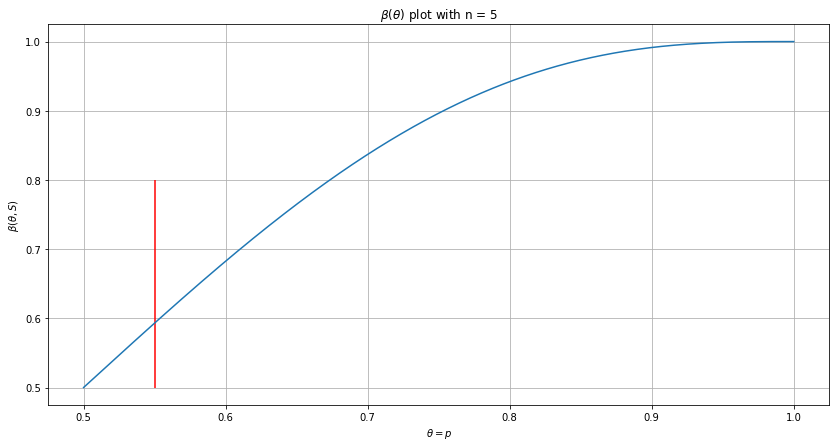

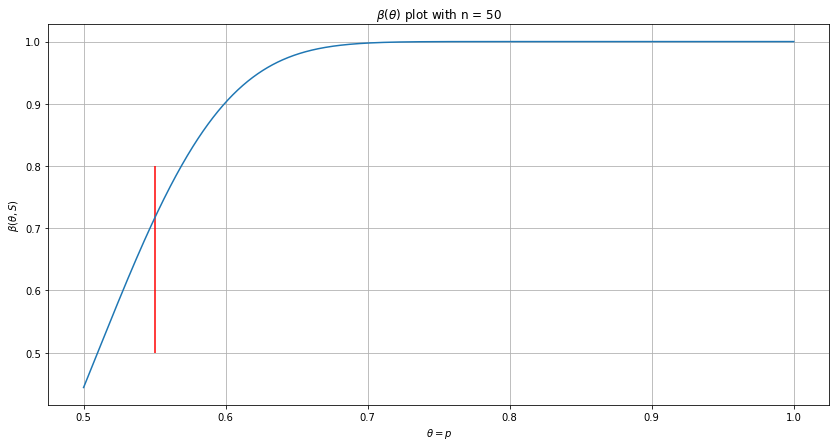

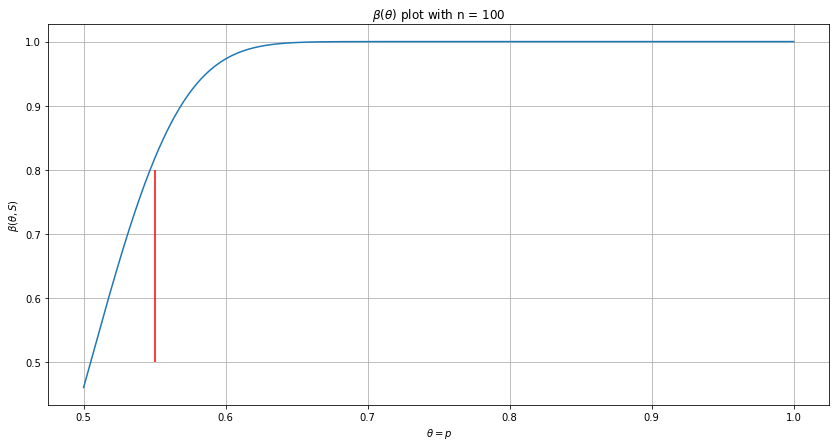

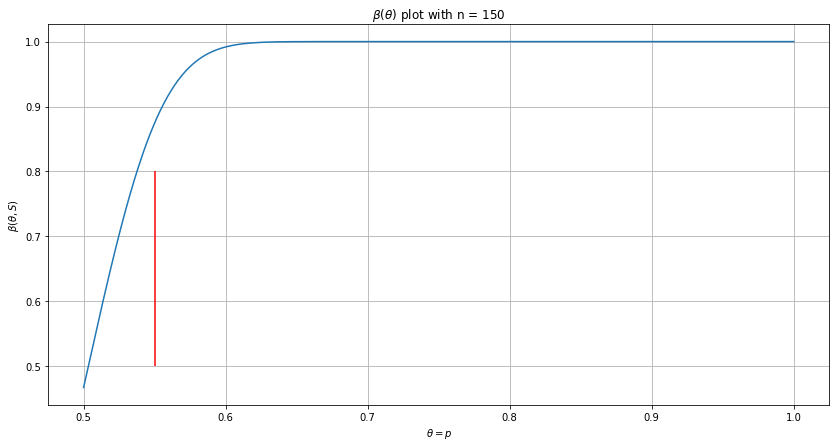

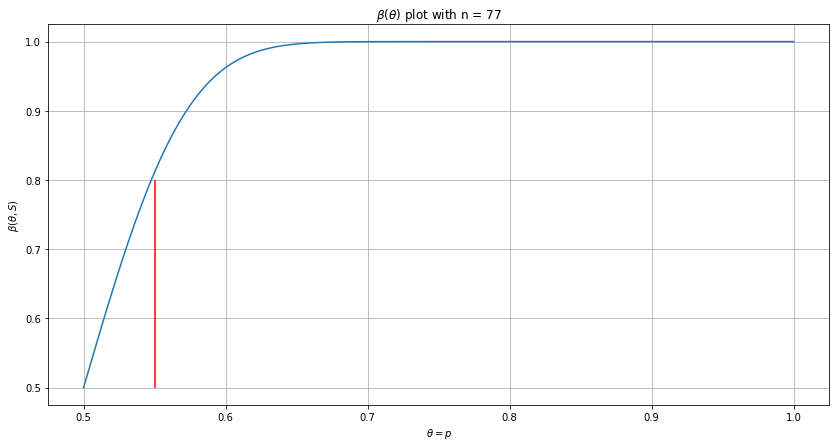

nstar = 77


In [416]:
pstar = 0.55 # мы же его сами выбираем, с помощь "оракула" ?
def beta(theta, ca):
    return 1. - sps.binom(n=n, p=theta).cdf(ca)


for n in [5, 50, 100, 150, 77]:
    ca = sps.binom(n=n,p=theta_0).ppf(alpha)
    grid = np.linspace(0.5, 1, 1000)
    f = np.array([
        beta(i, ca) for i in grid
    ])
    #print(f ,ca)
    plt.figure(figsize=(14, 7))
    plt.plot(grid, f)
    plt.grid()
    plt.vlines(0.55, 0.5, 0.8, color="red")
    plt.title(r"$\beta(\theta)$ plot with n = %d" % n)
    plt.ylabel(r"$\beta(\theta, S)$")
    plt.xlabel(r"$\theta = p$")
    plt.show()
    
nstar = 5
for n in range(5, 500):
    ca = sps.binom(n=n,p=theta_0).ppf(alpha)
    if (beta(pstar, ca) >= 0.8):
        nstar = n
        print("nstar = %d" % n)
        break

Имеем $n^*=77$ (минимальное такое, что можность на $p^*$ даёт 0.8) 

In [436]:
theta_0 = pstar #0.5
alpha=0.5
print(nstar, pstar)
for n,xp in [(nstar, pstar - (pstar - 0.5) /2.), (nstar, pstar), (nstar, pstar + (pstar - 0.5) /2.) , (nstar, (1 + pstar) /2.)]:
    X = sps.bernoulli(p=xp).rvs(size=(10, n))
    
    df = []
    for Xi in X:
        t = Xi.sum()
        ca = sps.binom(n=n,p=theta_0).ppf(alpha)
        pval = 1. - sps.binom(n=n,p=theta_0).cdf(t) 
        accepted = not(t > ca)
        df.append([n, xp, t, ca, pval, accepted, 1 * (not accepted)])

    df = pd.DataFrame(df, columns= ["n", "xp", "t", "ca", "pvalue", "accepted", "H_i"])
    display(df)


77 0.55


,n,xp,t,ca,pvalue,accepted,H_i
0,77,0.525,44,42.0,0.312362,False,1
1,77,0.525,42,42.0,0.487840,True,0
2,77,0.525,39,42.0,0.743651,True,0
3,77,0.525,42,42.0,0.487840,True,0
4,77,0.525,39,42.0,0.743651,True,0
5,77,0.525,53,42.0,0.004762,False,1
6,77,0.525,40,42.0,0.665145,True,0
7,77,0.525,39,42.0,0.743651,True,0
8,77,0.525,39,42.0,0.743651,True,0
9,77,0.525,43,42.0,0.397594,False,1


,n,xp,t,ca,pvalue,accepted,H_i
0,77,0.55,50,42.0,0.029921,False,1
1,77,0.55,42,42.0,0.487840,True,0
2,77,0.55,33,42.0,0.978424,True,0
3,77,0.55,47,42.0,0.118655,False,1
4,77,0.55,36,42.0,0.909583,True,0
5,77,0.55,49,42.0,0.049724,False,1
6,77,0.55,43,42.0,0.397594,False,1
7,77,0.55,48,42.0,0.078657,False,1
8,77,0.55,38,42.0,0.811264,True,0
9,77,0.55,37,42.0,0.866584,True,0


,n,xp,t,ca,pvalue,accepted,H_i
0,77,0.575,47,42.0,0.118655,False,1
1,77,0.575,36,42.0,0.909583,True,0
2,77,0.575,44,42.0,0.312362,False,1
3,77,0.575,46,42.0,0.171016,False,1
4,77,0.575,49,42.0,0.049724,False,1
5,77,0.575,43,42.0,0.397594,False,1
6,77,0.575,38,42.0,0.811264,True,0
7,77,0.575,41,42.0,0.578554,True,0
8,77,0.575,48,42.0,0.078657,False,1
9,77,0.575,45,42.0,0.235969,False,1


,n,xp,t,ca,pvalue,accepted,H_i
0,77,0.775,57,42.0,1.837348e-04,False,1
1,77,0.775,54,42.0,2.309977e-03,False,1
2,77,0.775,58,42.0,6.951970e-05,False,1
3,77,0.775,60,42.0,8.081576e-06,False,1
4,77,0.775,57,42.0,1.837348e-04,False,1
5,77,0.775,58,42.0,6.951970e-05,False,1
6,77,0.775,54,42.0,2.309977e-03,False,1
7,77,0.775,59,42.0,2.456498e-05,False,1
8,77,0.775,60,42.0,8.081576e-06,False,1
9,77,0.775,62,42.0,6.961105e-07,False,1


** Вывод: ** мощность критерия есть (1 - (вероятность ошибки второго рода)) (принять неверную $H_0$), что видно из предпоследней таблицы $(1 - 7/10 = 0,3 \sim 0.2)$ ошибок второго рода совершено. Для значений $p \in (0.5, p^*)$ имеем 7 из 10 принятых, т.е. при приближении p = 0.5 вероятность принятия стабильна, что позволяет избежать "болтанки" критерия, как это было выше.

### Справка для выполнения следующих задач

**Критерий согласия хи-квадрат**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare>`scipy.stats.chisquare`</a>`(f_obs, f_exp=None, ddof=0)`

`f_obs` --- число элементов выборки, попавших в каждый из интервалов

`f_exp` --- ожидаемое число элементов выборки (по умолчанию равномерное)

`ddof` --- поправка на число степеней свободы. Статистика асимптотически будет иметь распределение хи-квадрат с числом степеней свободы $k - 1 - ddof$, где $k$ --- число интервалов.

Возвращает значение статистики критерия и соответствующее p-value.

**Критерий согласия Колмогорова**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest>`scipy.stats.kstest`</a>`(rvs, cdf, args=())`

`rvs` --- выборка

`cdf` --- функция распределения (сама функция или ее название)

`args` --- параметры распределения

Возвращает значение статистики критерия и соответствующее p-value.

**Задача 7.**

* Проверьте, что ваша выборка значений скорости ветра из задания 2 действительно согласуется с распределением Вейбулла.

* Проверьте, что при больших $n$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближают предельное распределение.

* Проверьте, что остатки в регрессии из задач выше нормальны.

* Подберите класс распределений для выборки количества друзей из задания 1.

Использовать можно два описанных выше критерия, либо любой другой критерий, если будет обоснована необходимость его применения в данной задаче, а так же будет приведено краткое описание критерия.
Уровень значимости взять равным 0.05.

In [467]:
X = [2,1,2,3,3,4,2,5,1,2,1,1,2,4,1,1,1,2,1,3,4,2,3,3,4,4,5,3,4,3,4,1,2,3,2,1,6,1,1,4,4,4,2,2,1,3,2,4,5,2,4,4,3,4,5,3,2,3,4,1,3,4,4,3,3,1,4,4,1,3,2, (0.01) ,3,2,1,1,1,1,1,1,1,4,7,3,4,3,2,1,2,1,2,2, (0.01) ,1,1,4,2,2,1,1,3,2,2,1,3,4,6,3,1,1,5,2,4,6,6,6,3,4,3,4,4,2,4,6,5,3,6,2,3,2,3,3,3,3,2,3,3,3,5,4,3,3,2,3,2,4,]
X = np.array(X,dtype=float) # weather in Ufa, Russia (Nov 1 2016 - Mar 26 2017)
print(X.shape)

K = 1.92224
L = 3.111
scipy.stats.kstest(X, sps.weibull_min(c=K, scale=L).cdf, args=() )

(146,)


KstestResult(statistic=0.16124337305586867, pvalue=0.00087636147853897839)

____________
Как видим, результат прошлых лет так себе. Попробуем подогнать:
____________

In [468]:
pvmax = 0
args = (-1, -1)
for K in np.linspace(1.8, 1.9, 100):#1.8, 2.1, 100):
    for L in np.linspace(3.2, 3.3, 100):#2.9, 3.3, 100):
        pvalue = scipy.stats.kstest(X, sps.weibull_min(c=K, scale=L).cdf, args=() ).pvalue
        if (pvmax < pvalue):
            pvmax = pvalue
            args = (K,L)
print(pvmax, args)

0.0139731999675 (1.8686868686868687, 3.2646464646464648)


__________
**Комментарий:** Имеем плохой результат (гипотеза должна быть отвергнута, pvalue<0.05). Возможно, это связано с грубым округлением значений до целых.
__________

In [464]:
def Tn_prep(n, J, X, mean):
    ES = X[:]
    ES = ES.cumsum(axis=1) / np.arange(1, ES.shape[1] + 1)

    Tn = np.tile(np.arange(1, n + 1), (J, 1))
    Tn = np.sqrt(Tn) * (ES - mean)

    # SELF-CHECK (TODO REMOVE THIS)
    # Z = [[math.sqrt(j) * ((X[i][0:j]).mean() - mean) for j in range(1, X.shape[1] + 1)] for i in range(X.shape[0])]
    # Z = np.array(Z)
    # print("Tn - Z = ", Tn - Z) # should be zeroes
    # END SELF-CHECK 
    
    return Tn

def plot1(n, J, Tn):
    plt.figure(figsize=(14,5))
    plt.title("$T_{j} (n)$")
    for T in Tn:
        plt.plot(np.arange(1, T.size + 1), T, alpha=0.2, color="black")
    plt.show()
 
J = 200
n = 300
Tn = Tn_prep(n=n, J=J, X=sps.norm.rvs(size=(J,n), loc=0., scale=1.), mean=0.)

#plot1(n, J, Tn)
print(Tn.shape)
X = Tn[:, -1]
scipy.stats.kstest(X, sps.norm().cdf, args=() )

(200, 300)


KstestResult(statistic=0.048961873978044745, pvalue=0.74241334650099944)

_____________
**Комментарий:** Успех! pvalue достатчно большое, мы можем принять гипотезу (№3 a) (**можем принять гипотезу здесь и далее означает "что нулевую гипотезу нельзя отвергнуть"**)
_____________

In [469]:
J = 200
n = 500
Tn = Tn_prep(n=n, J=J, X=sps.poisson.rvs(size=(J,n), mu=1.), mean=1.)
X = Tn[:, -1]
scipy.stats.kstest(X, sps.norm().cdf, args=() )

KstestResult(statistic=0.062164704135159954, pvalue=0.40913488492880878)

_____________
**Комментарий:** Успех! pvalue достатчно большое (>>0.05), мы можем принять гипотезу (№3 б)
_____________

In [470]:
n = 300
J = 200
theta = 1.

X = sps.uniform.rvs(size=(J, n), loc=0., scale=theta)
ES = X[:]
ES = np.maximum.accumulate(ES, axis=1)

Tn = np.tile(np.arange(1, n + 1), (J, 1))
Tn = Tn * (theta - ES) # n(\theta - X_{(n)})

# SELF-CHECK (TODO REMOVE THIS)
# Z = [[j * (theta - (X[i][0:j]).max()) for j in range(1, X.shape[1] + 1)] for i in range(X.shape[0])]
# Z = np.array(Z)
# print("Tn - Z = ", Tn - Z) # should be zeroes
# END SELF-CHECK 

#plt.figure(figsize=(14,5))
#plt.title("$T_{j} (n)$")
#for T in Tn:
#    plt.plot(np.arange(1, T.size + 1), T, alpha=0.2, color="black")
#plt.show()

T300 = Tn[:,-1]
#dens = KDEUnivariate(T300)
#dens.fit()
#grid = np.linspace(T300.min() - 1., T300.max() + 1., 100)
#plt.figure(figsize=(14,5))
#plt.plot(grid, sps.expon.pdf(grid, scale=1./theta), color="green", label="$Exp(\\theta=1) density $")
#plt.plot(grid, dens.evaluate(grid), color="red", label="$T_{i, 300} kde$")
#plt.hist(T300, bins=10, normed=True, alpha=0.4, label="$T_{i, 300} histogram$")
#plt.scatter(T300, np.ones(J) * -0.01, alpha=0.2, color="blue", label="$T_{i, 300} values$")
#plt.legend()
#plt.show()
X = T300
scipy.stats.kstest(X, sps.expon().cdf, args=() )

KstestResult(statistic=0.060529743707874673, pvalue=0.44382195759181409)

_____________
**Комментарий:** Предположение подтверждается kstest-ом (0.44 >> 0.05)
_____________

In [478]:
df = pd.read_csv("ice_cream.txt", sep="\t")
Y = df.IC.values
temp = df.temp.values
temp = (temp - 32) / 1.8
X = np.array([np.ones(temp.size), temp]).T
#print(df)
#print(X.T)
#print(Y)

LR = LinearRegression()
LR.fit(X=X, Y=Y)
LR.summary()

X_kstest = Y - LR.predict(X)
mean = X_kstest.mean()
S2 = (X_kstest*X_kstest).mean() - (mean**2)
scipy.stats.kstest(X_kstest, sps.norm(loc=mean, scale=np.sqrt(S2)).cdf, args=() )

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_0:	0.283276	0.306298	0.329319
theta_1:	0.003831	0.005593	0.007355


KstestResult(statistic=0.10018504045522847, pvalue=0.92408052932748452)

_____________
**Комментарий:** в качестве параметров используем оценки, которые мы много раз доказывали, что хорошие.
Kstest возращает pvalue~0.9 >> 0.05, что говорит о верности предположения (это первая модель задачи о мороженом)
_____________

In [479]:
df = pd.read_fwf("yacht_hydrodynamics.data", sep=' ', header=None)
# print(df.values, df.values.shape) # we just removed "\n" from
X = df.values[:, 0:6]
Y = df.values[:, 6]
# print(X.shape, Y.shape) 

LR = LinearRegression()
LR.fit(X=X, Y=Y)
LR.summary()

X_kstest = Y - LR.predict(X)
mean = X_kstest.mean()
S2 = (X_kstest*X_kstest).mean() - (mean**2)
scipy.stats.kstest(X_kstest, sps.norm(loc=mean, scale=np.sqrt(S2)).cdf, args=() )

Linear regression on 6 features and 308 examples
Sigma: 80.142563
		Lower		Estimation	Upper
theta_0:	-0.470390	0.194335	0.859059
theta_1:	-67.111403	-35.615932	-4.120461
theta_2:	-19.470413	-4.163103	11.144207
theta_3:	-5.114255	1.374728	7.863711
theta_4:	-14.213253	3.323200	20.859653
theta_5:	111.528380	121.474511	131.420641


KstestResult(statistic=0.092603828329746896, pvalue=0.009490111456521122)

_____________
**Комментарий:** используя те же оценки, получаем, что pvalue < 0.05, т.е. гипотеза о нормальности остатков должна быть отвергнута. (Это задача про гидродинамику яхт, и MSE ~ 80 при значениях от 0 до 40 ($sqrt(80) > 8) подтверждает, что использование предположения о линейности остатков не уместно)
_____________

In [ ]:
import vk
import time

session = vk.Session()
api = vk.API(session)

def getFiendsCount(users):
    res = []
    for user in users:
        try:
            res.append(len(api.friends.get(user_id=user)))
        except Exception:
            pass
    return res

MiptOfficialGroupMembers = api.groups.getMembers(group_id="miptru")
print("We have reached", len(MiptOfficialGroupMembers["users"]),
      "https://vk.com/miptru members")
# https://vk.com/dev/groups.getMembers - we cannot get more than 1e3 members ...

MiptOfficialGroupMembersFriendsCount = getFiendsCount(MiptOfficialGroupMembers["users"])
print("We have reached info about",
      len(MiptOfficialGroupMembersFriendsCount), "of them")
# somebody close info or deleted...

X = np.array(MiptOfficialGroupMembersFriendsCount, dtype=float)

def plotPeople(X, drawNorm = None, drawGamma = None):
    print("min =", X.min(), ", max =", X.max())
    xMin = X.min()
    xMax = X.max()
    delta = (xMax - xMin) / 20. # for KDE tie
    grid = np.linspace(xMin - delta, X.max() + delta, 1000) # for 
    ecdf = ECDF(X)

    density = KDEUnivariate(X) 
    density.fit()

    plt.figure(figsize=(14, 7))
    plt.plot(grid, density.evaluate(grid), color="green", label="kde")
    plt.plot(grid, ecdf(grid), color="red", label = "ecdf")
        
    if drawGamma != None:
        plt.plot(grid, sps.gamma.cdf(grid, a=drawGamma[0],
                scale=drawGamma[1]), color="yellow",
                label = "Gamma(" + str(drawGamma[0]) +
                 "," + str(drawGamma[1]) + ") cdf")
        
    if drawNorm != None:
        plt.plot(grid, sps.norm.cdf(grid, loc=drawNorm[0],
                scale=drawNorm[1]), color="magenta",
                label = "N(" + str(drawNorm[0]) + "," +
                 str(drawNorm[1]) + ") cdf")
        
    plt.scatter(X, np.zeros(X.size), alpha=0.1)
    plt.grid(ls=":")
    plt.legend()
    plt.show()

    plt.figure(figsize=(14, 7))
    
    if drawGamma != None:
        plt.plot(grid, sps.gamma.pdf(grid, a=drawGamma[0],
                scale=drawGamma[1]), color="yellow",
                label = "Gamma(" + str(drawGamma[0]) + "," +
                 str(drawGamma[1]) + ") pdf")
        
    if drawNorm != None:
        plt.plot(grid, sps.norm.pdf(grid, loc=drawNorm[0],
                scale=drawNorm[1]), color="magenta",
                label = "N(" + str(drawNorm[0]) + "," +
                 str(drawNorm[1]) + ") pdf")
        
    plt.plot(grid, density.evaluate(grid), color="green", label="kde")
    plt.scatter(X, np.zeros(X.size), alpha=0.1)
    plt.grid(ls=":")
    plt.legend()
    plt.show()

# plotPeople(X)

import heapq
XCut = X[:]
#val = heapq.nlargest(20, XCut)[-1]
val = 1000 # this is false that somebody have more than thousand of people
print("Let's remove people, who has more than", val, "friends")
willBeDeleted = (XCut >= val).sum()
print("We have deleted", willBeDeleted ,
      "(",willBeDeleted / XCut.size * 100.,"%)" )
XCut = XCut[XCut < val]

import math
x1 = XCut.mean()
x2 = (XCut * XCut).mean()

def gauMoments(x1, x2): # оценки по методу моментов
    second = (x2 - x1*x1) / x1
    return (x1 / second, second)
def normMoments(x1, x2):
    return (x1, math.sqrt(x2 - x1*x1)) # аргумент scale - в sps под корнем

In [483]:
#print("Подберём подходящее значение и распределение руками")
#plotPeople(XCut, drawNorm = (178, 138), drawGamma = (2.8, 96))

scipy.stats.kstest(XCut, sps.norm(loc=178, scale=138).cdf, args=() )

KstestResult(statistic=0.15205468206999018, pvalue=0.0)

In [484]:
scipy.stats.kstest(XCut, sps.gamma(a=2.8, scale=96).cdf, args=() )

KstestResult(statistic=0.045632139136575656, pvalue=0.040814335925567047)

_____________
**Комментарий:** Ожидалось, что у числа друзей будет нормальное распределение. Однако, подобранное ручками gamma-распределение даёт близкий к приемлемому результат.
_____________

In [485]:
#print("Ещё раз, но по методу моментов")
#plotPeople(XCut, drawNorm = normMoments(x1, x2),
 #          drawGamma = gauMoments(x1, x2))
drawNorm = normMoments(x1, x2)
scipy.stats.kstest(XCut, sps.norm(loc=drawNorm[0], scale=drawNorm[1]).cdf, args=() )

KstestResult(statistic=0.11986002516525207, pvalue=4.6149750687618507e-12)

In [486]:
drawGamma = gauMoments(x1, x2)
scipy.stats.kstest(XCut, sps.norm(loc=drawGamma[0], scale=drawGamma[1]).cdf, args=() )

KstestResult(statistic=0.62112260247064222, pvalue=0.0)

In [496]:
pvmax = 0
args = (-1, -1)
for loc in np.linspace(245, 250, 100):# итеративный подгон
    for scale in np.linspace(165, 170, 100):# итеративный подгон
        pvalue = scipy.stats.kstest(XCut, sps.norm(loc=loc, scale=scale).cdf, args=() ).pvalue
        if (pvmax < pvalue):
            pvmax = pvalue
            args = (loc,scale)
print(pvmax, args)

0.000265257624611 (247.87878787878788, 167.27272727272728)


In [502]:
pvmax = 0
args = (-1, -1)
for loc in np.linspace(0.01, 20, 200):# итеративный подгон
    for scale in np.linspace(0.01, 200, 200):# итеративный подгон
        pvalue = scipy.stats.kstest(XCut, sps.gamma(a=loc, scale=scale).cdf, args=() ).pvalue
        if (pvmax < pvalue):
            pvmax = pvalue
            args = (loc,scale)
print(pvmax, args)

0.571569993504 (2.1194974874371857, 126.63683417085429)


In [504]:
pvmax = 0
args = (-1, -1)
for loc in np.linspace(0.01, 1000, 100):# итеративный подгон
    for scale in np.linspace(0.01, 1000, 100):# итеративный подгон
        pvalue = scipy.stats.kstest(XCut, sps.lognorm(loc, scale).cdf, args=() ).pvalue
        if (pvmax < pvalue):
            pvmax = pvalue
            args = (loc,scale)
print(pvmax, args)

0 (-1, -1)


_____________
**Комментарий:** Ожидалось, что у числа друзей будет нормальное распределение. (Так на лекции говорили, нет?)
Однако, из рассмотренных мной нормального и гамма-распределений только gamma нельзя отвергнуть (и его нужно принять! 0.57 >> 0.05)
_____________

**Задача 8<font size="5" color="red">\*</font>.** Проведите исследование согласно примеру 2 параграфа 2 главы 18 книги 
М.Б. Лагутина "Наглядная математическая статистика".

**Задача 9<font size="5" color="red">\*</font>.** 
Изучите Q-Q plot и критерий Шапиро-Уилка для проверки нормальности, напишите их теоретическое пояснение.
В изучении могут помочь материалы курса <a href="http://wiki.cs.hse.ru/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85"> ПСАД</a>.

Постройте графики Q-Q plot для различных распределений и дайте к ним пояснение.
Проверьте различные данные на нормальность с помощью различных критериев и Q-Q plot.
Данные можно использовать из задачи 7 или какие-либо еще, например, отдельные компоненты из Ирисов Фишера.
Постарайтесь так же правильно контролировать вероятность общей ошибки первого рода.